<a href="https://colab.research.google.com/github/Belligrent/lucifer/blob/main/PRODIGY_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
# Load the dataset
# Replace 'Mall_Customers.csv' with the path to your downloaded dataset
df = pd.read_csv('/content/Mall_Customers.csv')


In [14]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [15]:
# Selecting Annual Income (k$) and Spending Score (1-100) for clustering
X = df.iloc[:, [3, 4]].values

In [16]:
# Using the elbow method to find the optimal number of clusters (K)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

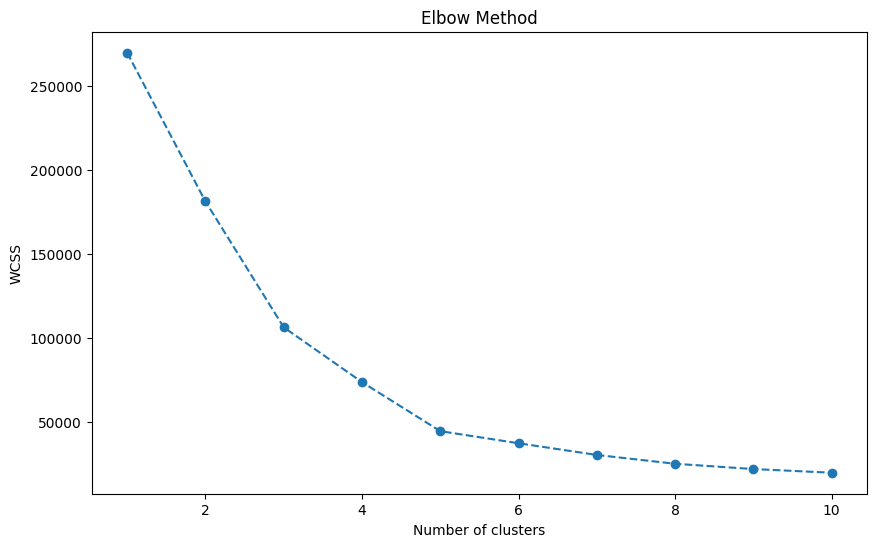

In [17]:
# Plotting the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [18]:
# From the elbow method graph, we can see that the optimal number of clusters is around 5

# Applying K-means to the dataset with K=5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

In [19]:
# Adding the cluster labels to the original dataset
df['Cluster'] = y_kmeans

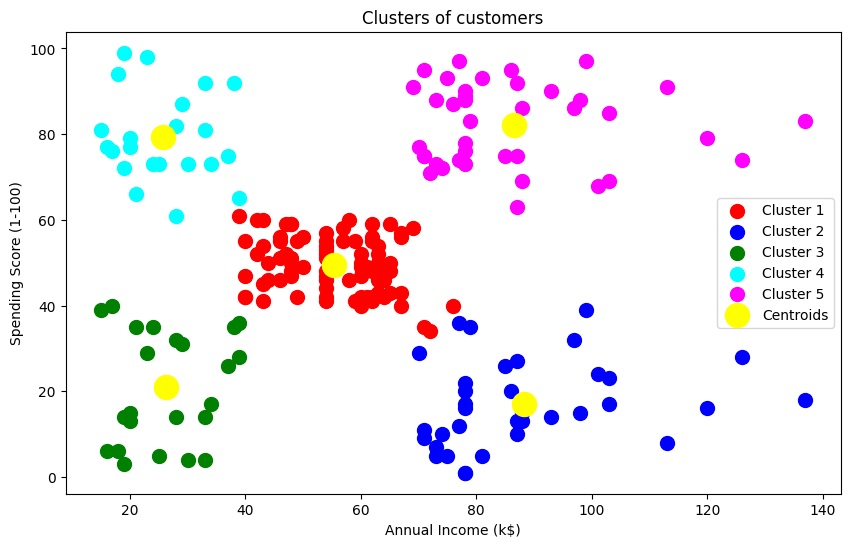

In [20]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [21]:
# Print the cluster centers and size of each cluster
for i in range(5):  # Assuming K=5
    cluster_size = np.sum(y_kmeans == i)
    print(f"Cluster {i+1} center: {kmeans.cluster_centers_[i]}, Size: {cluster_size}")


Cluster 1 center: [55.2962963  49.51851852], Size: 81
Cluster 2 center: [88.2        17.11428571], Size: 35
Cluster 3 center: [26.30434783 20.91304348], Size: 23
Cluster 4 center: [25.72727273 79.36363636], Size: 22
Cluster 5 center: [86.53846154 82.12820513], Size: 39
